# Apple Stock Price Predication

#### Import Libraris

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#### Import Data

In [5]:
df=pd.read_csv(r"C:\Users\HP\Documents\PGA 44\CP2\AAPL_short_volume.csv")

In [6]:
df.head()

,Date,Short Vol,Short Exempt Vol,Total Vol,% Shorted,Close
0,18/07/2023,8974071.0,92762.0,19136383.0,46.90,193.729996
1,17/07/2023,9867747.0,77497.0,19106282.0,51.65,193.990005
2,14/07/2023,6363715.0,98141.0,15104938.0,42.13,190.690002
3,13/07/2023,6148358.0,66729.0,16166076.0,38.03,190.539993
4,12/07/2023,8580496.0,84584.0,21275653.0,40.33,189.770004


In [7]:
df.columns

Index(['Date', 'Short Vol', 'Short Exempt Vol', 'Total Vol', '% Shorted',
       'Close'],
      dtype='object')

In [8]:
df.shape

(594, 6)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              251 non-null    object 
 1   Short Vol         251 non-null    float64
 2   Short Exempt Vol  251 non-null    float64
 3   Total Vol         251 non-null    float64
 4   % Shorted         251 non-null    float64
 5   Close             251 non-null    float64
dtypes: float64(5), object(1)
memory usage: 28.0+ KB


In [10]:
df.describe()

,Short Vol,Short Exempt Vol,Total Vol,% Shorted,Close
count,2.510000e+02,251.000000,2.510000e+02,251.000000,251.000000
mean,1.384093e+07,109434.912351,2.911626e+07,47.615618,156.991441
std,5.364879e+06,52597.869630,1.033348e+07,7.822336,16.380292
min,6.018671e+06,33430.000000,1.396917e+07,32.730000,124.656982
25%,9.840674e+06,75917.000000,2.110720e+07,41.155000,145.470390
50%,1.281541e+07,101323.000000,2.738535e+07,46.410000,153.756439
75%,1.697015e+07,126732.500000,3.453152e+07,54.960000,167.560501
max,3.938667e+07,523907.000000,7.772562e+07,65.150000,193.990005


In [11]:
#Check the null values

df.isnull().sum()

Date                343
Short Vol           343
Short Exempt Vol    343
Total Vol           343
% Shorted           343
Close               343
dtype: int64

In [12]:
# Fix the null values

df = df.dropna()

In [13]:
df.isnull().sum()

Date                0
Short Vol           0
Short Exempt Vol    0
Total Vol           0
% Shorted           0
Close               0
dtype: int64

In [14]:
df.shape

(251, 6)

In [15]:
# Check Duplicate values
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [16]:
df.to_csv("cleaned_stock_data.csv", index=False)


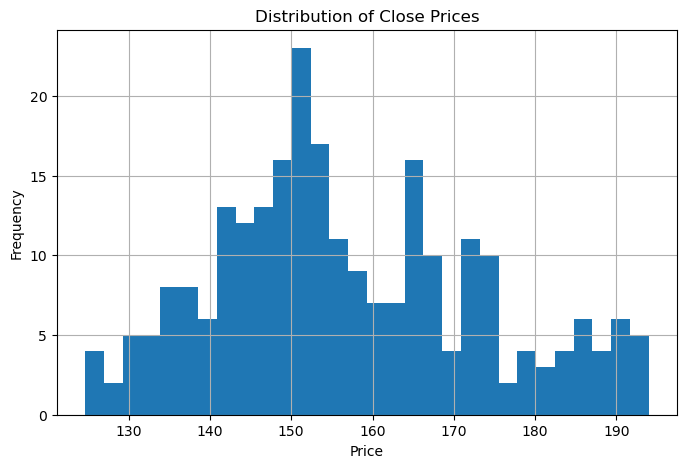

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["Close"].hist(bins=30)
plt.title("Distribution of Close Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


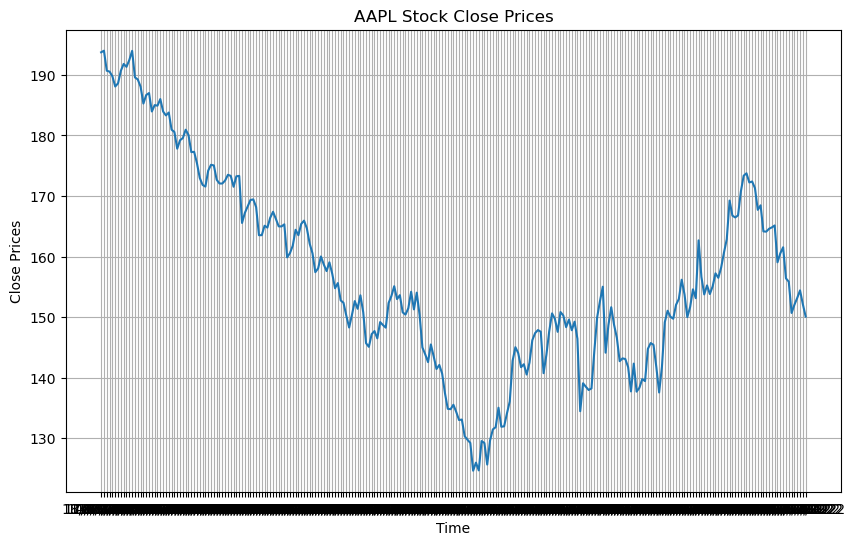

In [18]:
# Plot the line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('AAPL Stock Close Prices')
plt.grid(True)
plt.show()

In [19]:
close_prices_AAPL=df['Close']
close_prices_AAPL

0      193.729996
1      193.990005
2      190.690002
3      190.539993
4      189.770004
          ...    
246    152.042114
247    153.175354
248    154.427872
249    152.131576
250    150.103683
Name: Close, Length: 251, dtype: float64

In [20]:
# Reverse the order of the data
close_prices_AAPL_reverse = close_prices_AAPL.iloc[::-1]

In [21]:
# Reset index to maintain the correct time series order in the plot
close_prices_AAPL_reverse.reset_index(drop=True, inplace=True)
close_prices_AAPL_reverse 

0      150.103683
1      152.131576
2      154.427872
3      153.175354
4      152.042114
          ...    
246    189.770004
247    190.539993
248    190.690002
249    193.990005
250    193.729996
Name: Close, Length: 251, dtype: float64

In [22]:
close_prices_AAPL_reverse.to_csv("close_prices_AAPL_reverse.csv", index=False)


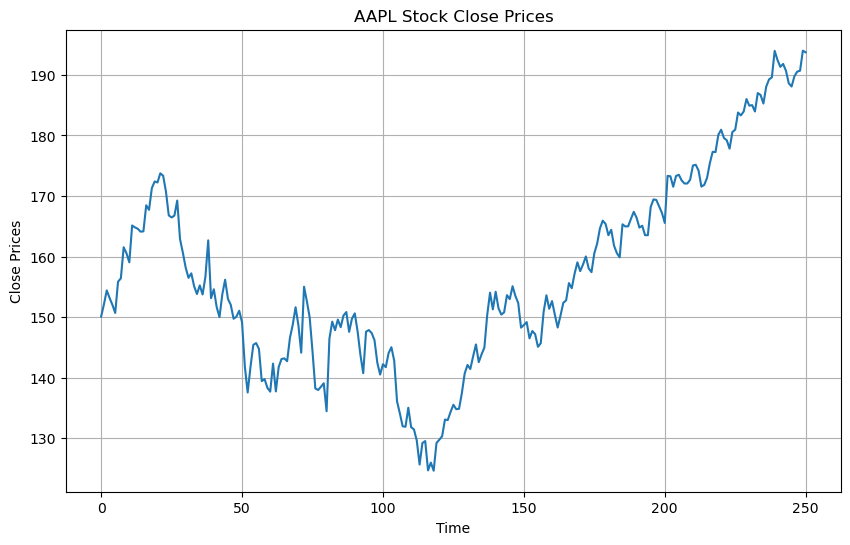

In [23]:
# Plot the line chart
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse)
plt.xlabel('Time')
plt.ylabel('Close Prices')
plt.title('AAPL Stock Close Prices')
plt.grid(True)
plt.show()

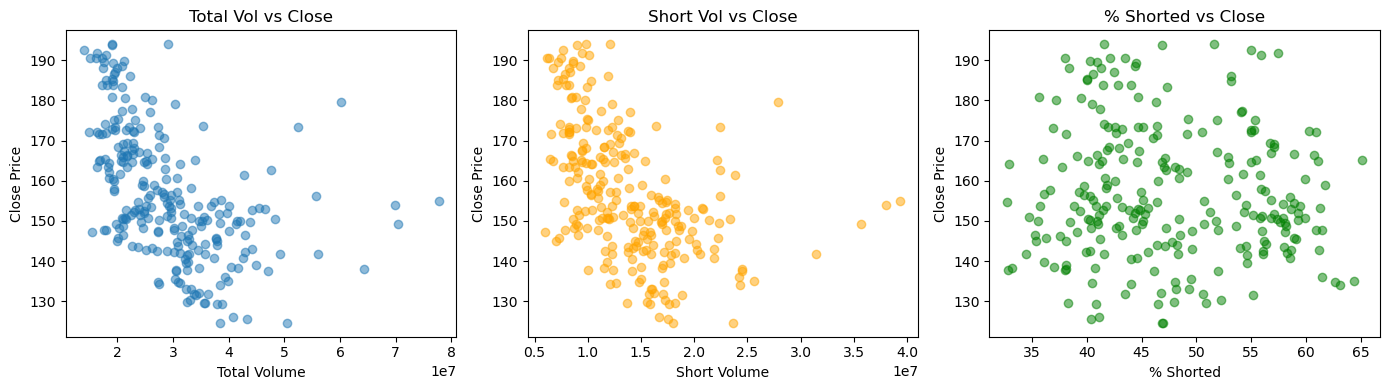

In [24]:
# Relationship Between Volume and Price

import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))

# Total Volume vs Close
plt.subplot(1,3,1)
plt.scatter(df["Total Vol"], df["Close"], alpha=0.5)
plt.xlabel("Total Volume")
plt.ylabel("Close Price")
plt.title("Total Vol vs Close")

# Short Volume vs Close
plt.subplot(1,3,2)
plt.scatter(df["Short Vol"], df["Close"], alpha=0.5, color="orange")
plt.xlabel("Short Volume")
plt.ylabel("Close Price")
plt.title("Short Vol vs Close")

# % Shorted vs Close
plt.subplot(1,3,3)
plt.scatter(df["% Shorted"], df["Close"], alpha=0.5, color="green")
plt.xlabel("% Shorted")
plt.ylabel("Close Price")
plt.title("% Shorted vs Close")

plt.tight_layout()
plt.show()


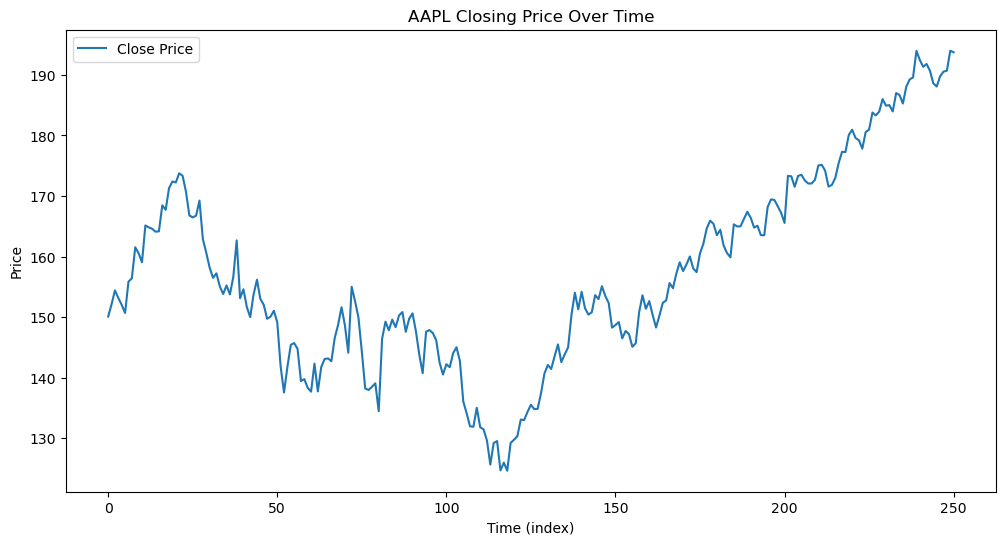

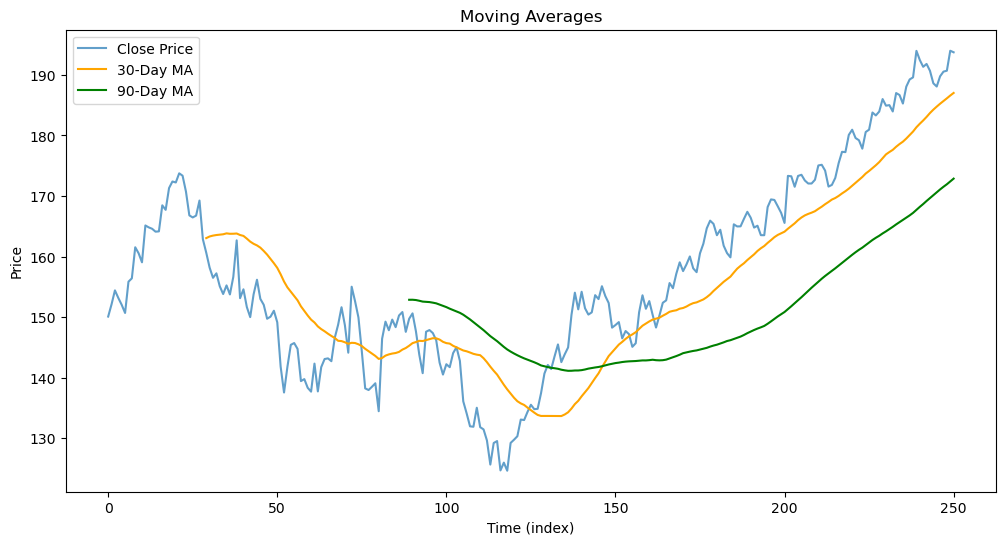

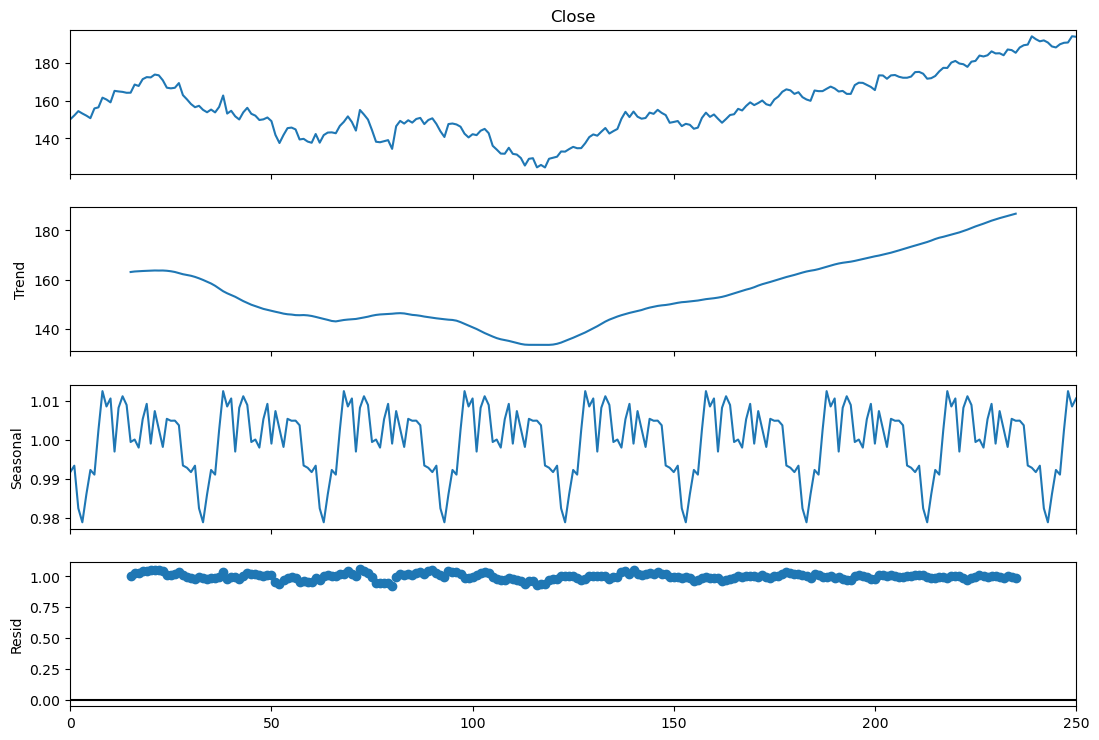

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Use the reversed close prices (your working series)
series = close_prices_AAPL_reverse.reset_index(drop=True)

# ========================
# Closing Price Over Time
# ========================
plt.figure(figsize=(12,6))
plt.plot(series, label="Close Price")
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Time (index)")
plt.ylabel("Price")
plt.legend()
plt.show()

# ========================
# Moving Averages
# ========================
plt.figure(figsize=(12,6))
plt.plot(series, label="Close Price", alpha=0.7)
plt.plot(series.rolling(window=30).mean(), label="30-Day MA", color="orange")
plt.plot(series.rolling(window=90).mean(), label="90-Day MA", color="green")
plt.title("Moving Averages")
plt.xlabel("Time (index)")
plt.ylabel("Price")
plt.legend()
plt.show()

# ========================
# Seasonal Decomposition
# ========================
# Use integer index and specify period (e.g., 30 for monthly seasonality)
decomposition = seasonal_decompose(series, model="multiplicative", period=30)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


In [25]:
# Data preprocessing
import numpy as np
data = close_prices_AAPL_reverse.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

In [26]:
# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [28]:
# hyperparameters for tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

In [29]:
# Performing hyperparameter tuning for LSTM model
best_rmse = float('inf')
best_lstm_model = None

In [30]:
from sklearn.metrics import mean_squared_error


In [31]:
for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            # Create and train LSTM model
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Check if current model has lower RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002576DC2A700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
2/

In [32]:
# Predict on the entire dataset using the best LSTM model
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Inverse normalize the LSTM predictions
all_lstm_predictions = all_lstm_predictions * np.max(data)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [33]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Support Vector Machines (SVM) Model
svm_model = SVR()

svm_params = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

svm_grid_search = GridSearchCV(svm_model, svm_params, scoring='neg_mean_squared_error')
svm_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
svm_best_model = svm_grid_search.best_estimator_
svm_predictions = svm_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

In [34]:
!pip install lightgbm


In [35]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")


# Random Forest Model
rf_model = RandomForestRegressor()

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf_grid_search = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error')
rf_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

# Gradient Boosting Methods (XGBoost)
xgb_model = XGBRegressor()

xgb_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring='neg_mean_squared_error')
xgb_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

# Gradient Boosting Methods (LightGBM)
lgbm_model = LGBMRegressor()

lgbm_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_params, scoring='neg_mean_squared_error')
lgbm_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_predictions = lgbm_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 1
[LightGBM] [Info] Start training from score 156.397265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [84]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# ===============================
# Random Forest Model
# ===============================
rf_model = RandomForestRegressor()

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

rf_grid_search = GridSearchCV(rf_model, rf_params, scoring='neg_mean_squared_error')
rf_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
rf_best_model = rf_grid_search.best_estimator_
rf_predictions = rf_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

# ===============================
# Gradient Boosting Methods (XGBoost)
# ===============================
xgb_model = XGBRegressor()

xgb_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_params, scoring='neg_mean_squared_error')
xgb_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
xgb_best_model = xgb_grid_search.best_estimator_
xgb_predictions = xgb_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

# ===============================
# Gradient Boosting Methods (LightGBM)
# ===============================
lgbm_model = LGBMRegressor()

lgbm_params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

lgbm_grid_search = GridSearchCV(lgbm_model, lgbm_params, scoring='neg_mean_squared_error')
lgbm_grid_search.fit(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1), close_prices_AAPL_reverse)
lgbm_best_model = lgbm_grid_search.best_estimator_
lgbm_predictions = lgbm_best_model.predict(np.arange(len(close_prices_AAPL_reverse)).reshape(-1, 1))

# ===============================
# ARIMA Model
# ===============================
# Train/Test split
train_size = int(len(close_prices_AAPL_reverse) * 0.8)
train, test = close_prices_AAPL_reverse[:train_size], close_prices_AAPL_reverse[train_size:]

# Fit ARIMA(p,d,q)
arima_model = sm.tsa.ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecast same length as test
arima_predictions = arima_fit.forecast(steps=len(test))

# Combine predictions with training for alignment
arima_full_predictions = np.concatenate([train, arima_predictions])

# Evaluate ARIMA
arima_mse = mean_squared_error(test, arima_predictions)
print(f"ARIMA MSE: {arima_mse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 1
[LightGBM] [Info] Start training from score 156.397265
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [96]:
# Train/Test split for ARIMA
train_size = int(len(close_prices_AAPL_reverse) * 0.8)
train, test = close_prices_AAPL_reverse[:train_size], close_prices_AAPL_reverse[train_size:]

# Fit ARIMA model (p,d,q) = (5,1,0) baseline
import statsmodels.api as sm
arima_model = sm.tsa.ARIMA(train, order=(5,1,0))
arima_fit = arima_model.fit()

# Forecast for test set
arima_forecast = arima_fit.forecast(steps=len(test))  # <-- This creates arima_forecast


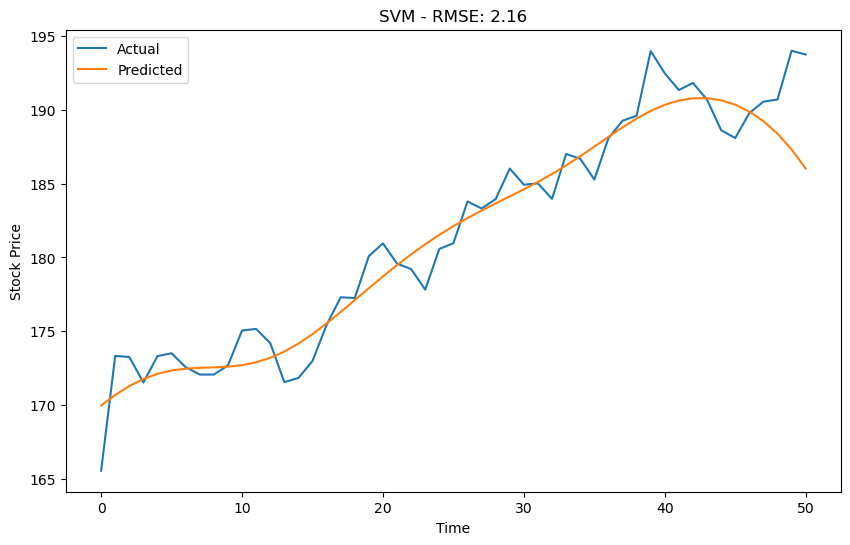

Best Hyperparameters / Summary for SVM:
SVR(C=10, gamma=0.01)
-----------------------------


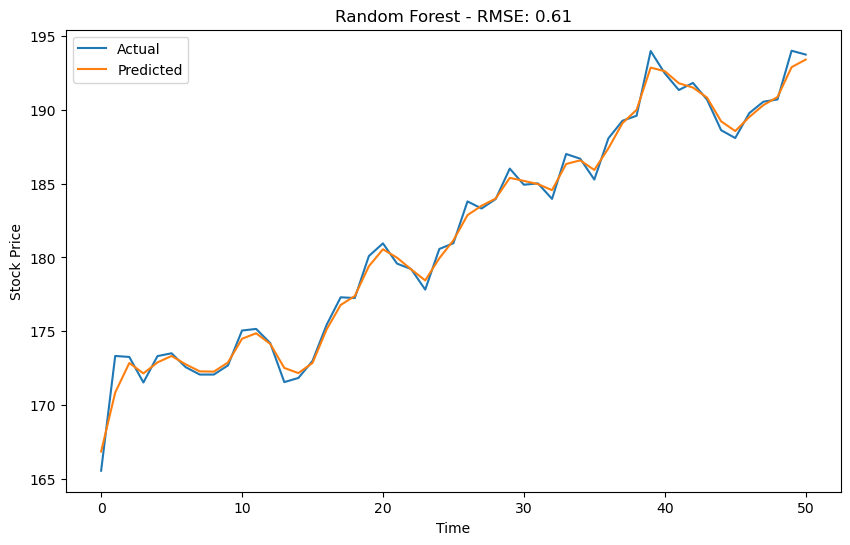

Best Hyperparameters / Summary for Random Forest:
RandomForestRegressor()
-----------------------------


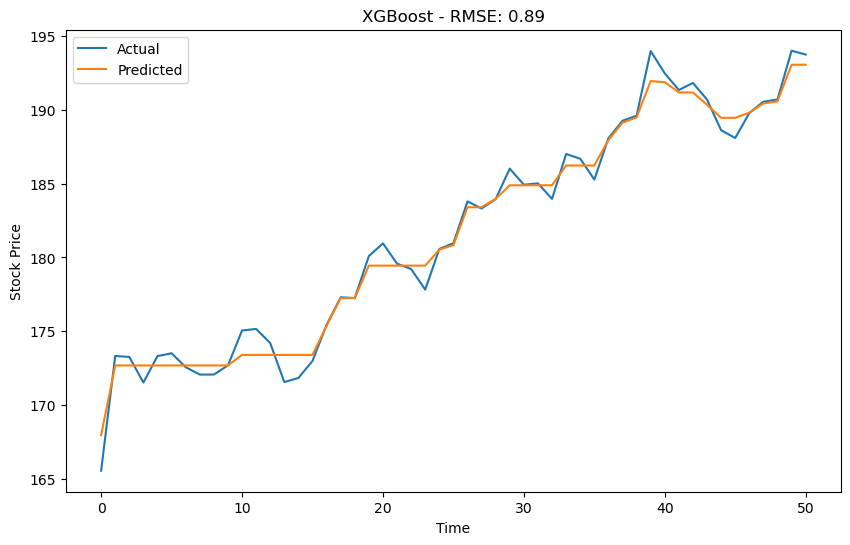

Best Hyperparameters / Summary for XGBoost:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
-----------------------------


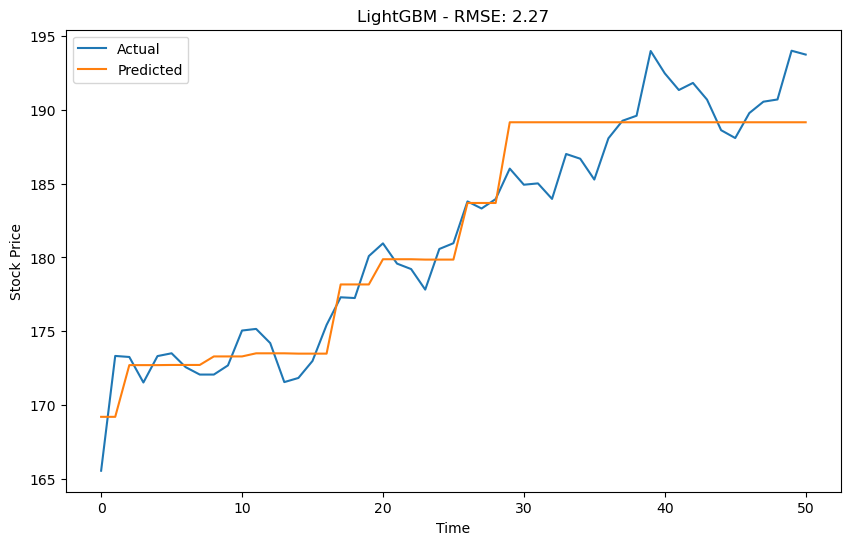

Best Hyperparameters / Summary for LightGBM:
LGBMRegressor(max_depth=7)
-----------------------------


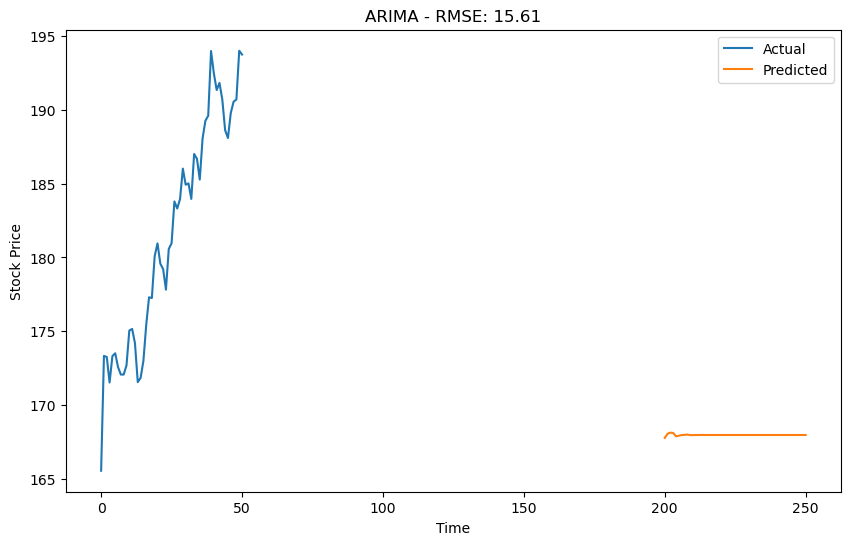

Best Hyperparameters / Summary for ARIMA:
-----------------------------


In [98]:
# Use only test set for evaluation
test_values = close_prices_AAPL_reverse[train_size:]

# Predictions aligned with test set
svm_predictions_test = svm_predictions[-len(test_values):]
rf_predictions_test = rf_predictions[-len(test_values):]
xgb_predictions_test = xgb_predictions[-len(test_values):]
lgbm_predictions_test = lgbm_predictions[-len(test_values):]
arima_predictions_test = arima_forecast  # now defined

# Model names and predictions
model_names = ['SVM', 'Random Forest', 'XGBoost', 'LightGBM', 'ARIMA']
predictions = [svm_predictions_test, rf_predictions_test, xgb_predictions_test, lgbm_predictions_test, arima_predictions_test]
best_models = [svm_best_model, rf_best_model, xgb_best_model, lgbm_best_model, arima_fit]

# Evaluation loop
for i, model_name in enumerate(model_names):
    model_prediction = predictions[i]
    model_rmse = rmse(test_values, model_prediction)

    plt.figure(figsize=(10,6))
    plt.plot(test_values.values, label="Actual")
    plt.plot(model_prediction, label="Predicted")
    plt.title(f"{model_name} - RMSE: {model_rmse:.2f}")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()

    print(f"Best Hyperparameters / Summary for {model_name}:")
    print(best_models[i])
    print("-----------------------------")


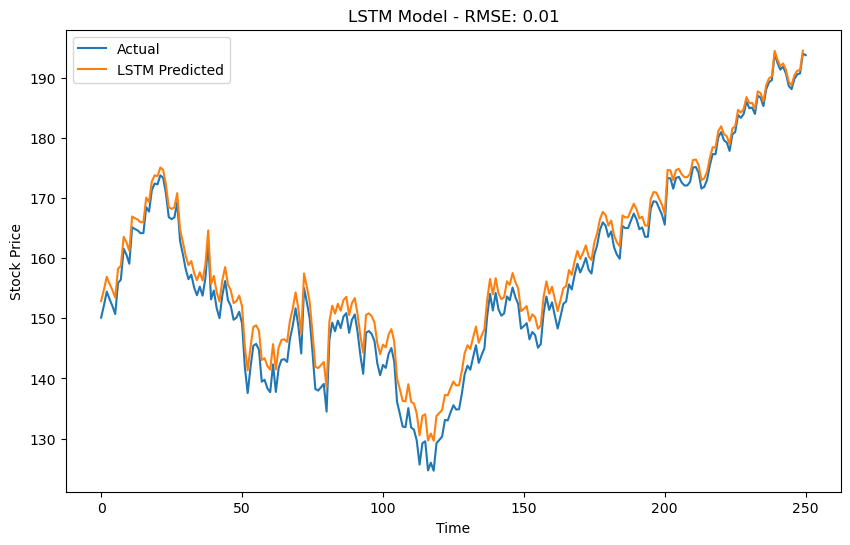

In [37]:
# Plotting LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(actual_values_reverse, label='Actual')
plt.plot(all_lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42m

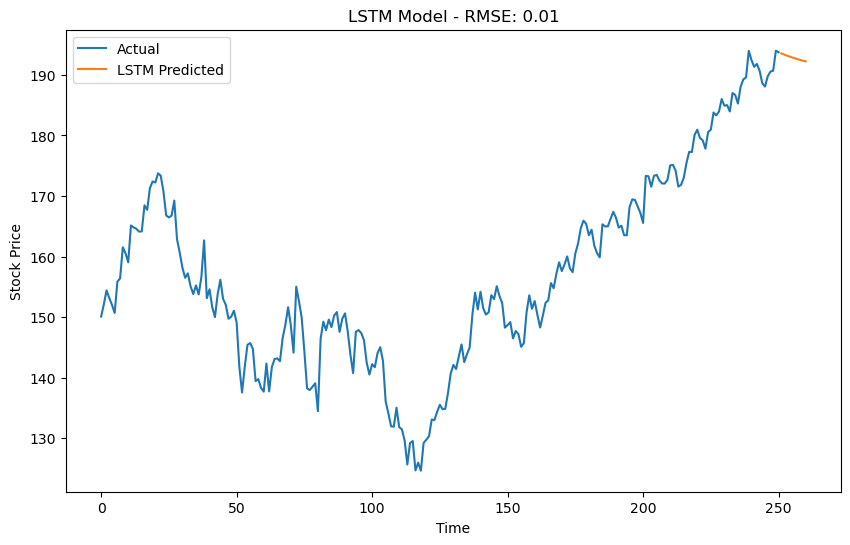

Predicted stock prices for the next 10 days:
Day 1: 193.54
Day 2: 193.37
Day 3: 193.20
Day 4: 193.04
Day 5: 192.88
Day 6: 192.74
Day 7: 192.60
Day 8: 192.47
Day 9: 192.34
Day 10: 192.22


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load the stock data
#file_path = r"C:\Users\HP\Documents\PGA 44\CP2\AAPL_short_volume.csv")
data = pd.read_csv(r"C:\Users\HP\Documents\PGA 44\CP2\cleaned_stock_data.csv")
close_prices_AAPL = data['Close']

# Reverse the order of the data
close_prices_AAPL_reverse = close_prices_AAPL.iloc[::-1]

# Reset index to maintain the correct time series order in the plot
close_prices_AAPL_reverse.reset_index(drop=True, inplace=True)

# Data preprocessing
data = close_prices_AAPL_reverse.values.reshape(-1, 1)  # Reshape the data
data_normalized = data / np.max(data)  # Normalize the data

# Split the data into training and testing sets
train_size = int(len(data_normalized) * 0.8)
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

# Function to create LSTM model
def create_lstm_model(units, activation, learning_rate):
    model = Sequential()
    model.add(LSTM(units=units, activation=activation, input_shape=(1, 1)))
    model.add(Dense(units=1))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Define hyperparameters for tuning
lstm_units = [50, 100, 200]
lstm_activations = ['relu', 'tanh']
learning_rates = [0.001, 0.01, 0.1]
epochs = 100
batch_size = 32

# Perform hyperparameter tuning for LSTM model
best_rmse = float('inf')
best_lstm_model = None

for units in lstm_units:
    for activation in lstm_activations:
        for learning_rate in learning_rates:
            # Create and train LSTM model
            model = create_lstm_model(units=units, activation=activation, learning_rate=learning_rate)
            model.fit(train_data[:-1].reshape(-1, 1, 1), train_data[1:], epochs=epochs, batch_size=batch_size, verbose=0)

            # Predict on test data
            test_predictions = model.predict(test_data[:-1].reshape(-1, 1, 1)).flatten()

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(test_data[1:], test_predictions))

            # Check if current model has lower RMSE
            if rmse < best_rmse:
                best_rmse = rmse
                best_lstm_model = model

# Predict on the entire dataset using the best LSTM model
all_lstm_predictions = best_lstm_model.predict(data_normalized[:-1].reshape(-1, 1, 1)).flatten()

# Inverse normalize the LSTM predictions
all_lstm_predictions = all_lstm_predictions * np.max(data)

# Calculate the scaling factor based on the maximum value of the original data
scaling_factor = np.max(close_prices_AAPL_reverse)

# Function to predict future stock prices using the LSTM model
def predict_future_lstm(model, data, num_predictions, scaling_factor):
    predictions = []

    # Get the last data point from the input data
    last_data_point = data[-1]

    for _ in range(num_predictions):
        # Predict the next time step
        prediction = model.predict(last_data_point.reshape(1, 1, 1))
        predictions.append(prediction[0, 0])

        # Update last_data_point to include the predicted value for the next iteration
        last_data_point = np.append(last_data_point[1:], prediction)

    # Inverse normalize the predictions
    predictions = np.array(predictions) * scaling_factor

    return predictions

# Predict the next 10 days using the LSTM model
num_predictions = 10
lstm_predictions = predict_future_lstm(best_lstm_model, data_normalized, num_predictions, scaling_factor)

# Plot the LSTM predictions for the next 10 days
plt.figure(figsize=(10, 6))
plt.plot(close_prices_AAPL_reverse, label='Actual')
plt.plot(np.arange(len(close_prices_AAPL_reverse), len(close_prices_AAPL_reverse) + num_predictions), lstm_predictions, label='LSTM Predicted')
plt.title(f"LSTM Model - RMSE: {best_rmse:.2f}")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print the predicted stock prices for the next 10 days using LSTM
print("Predicted stock prices for the next 10 days:")
for i, prediction in enumerate(lstm_predictions, start=1):
    print(f"Day {i}: {prediction:.2f}")


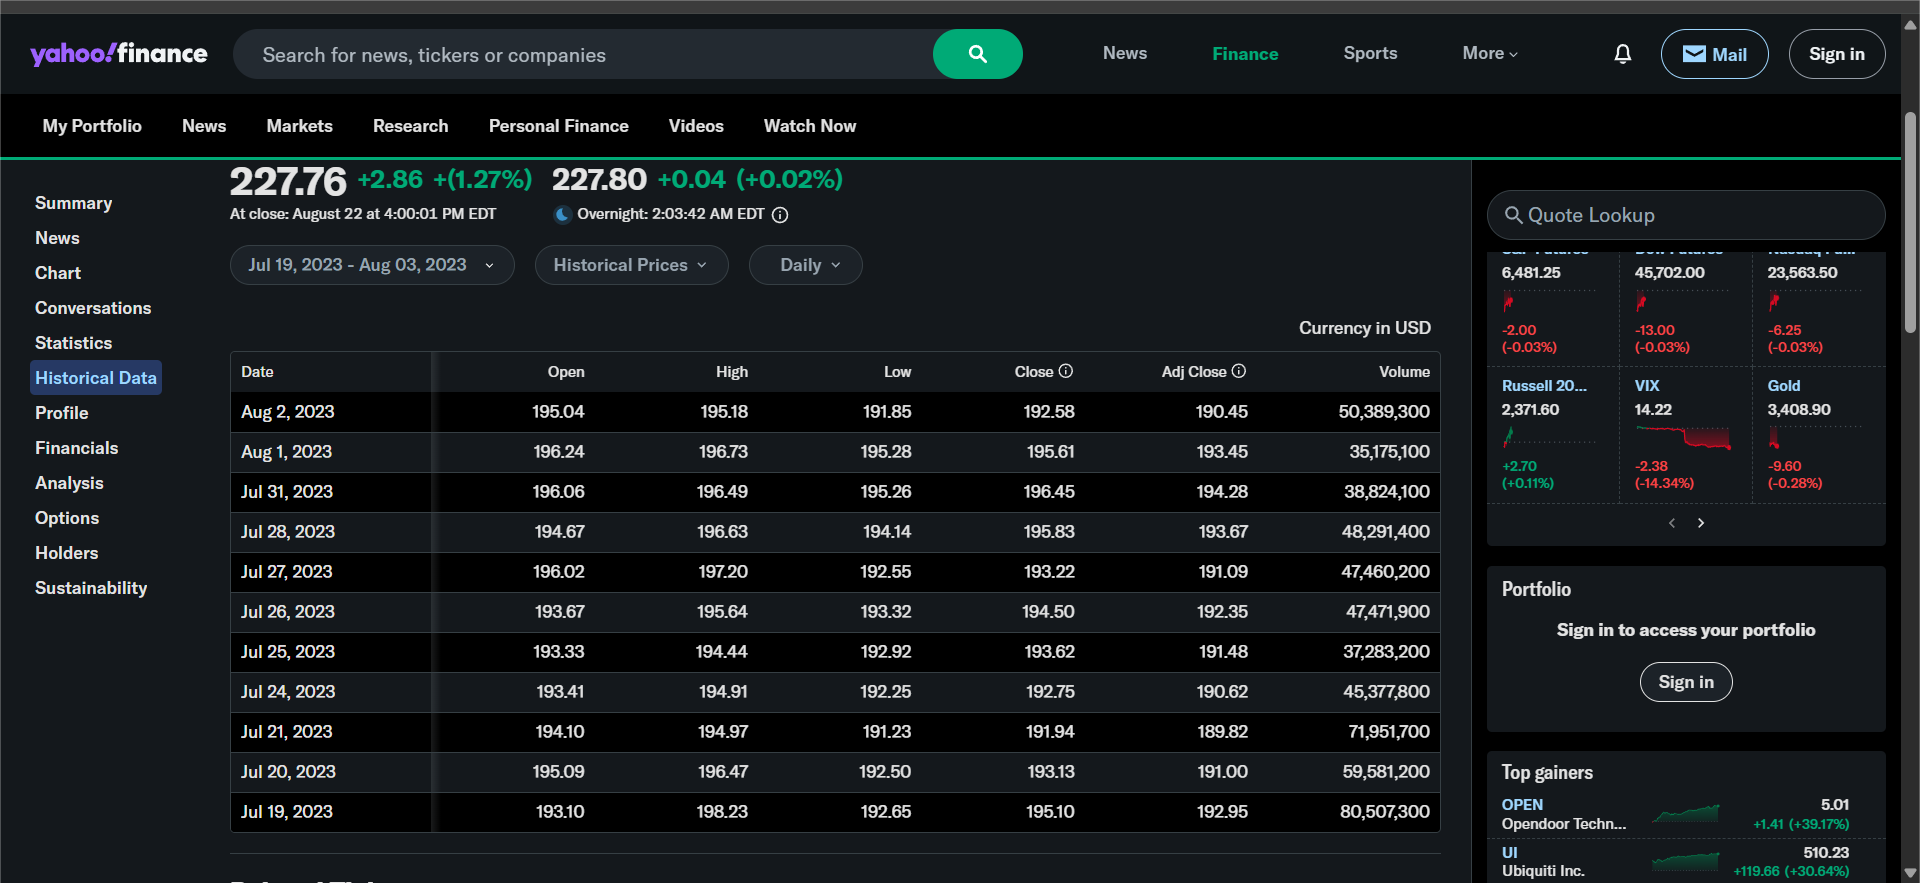

====================================================================================================

==================================================================================================